In [65]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas_ta as ta

for dirname, _, filenames in os.walk("data/aapl-options-data-2020-2023"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

data/aapl-options-data-2020-2023/aapl_2016_2020.csv
data/aapl-options-data-2020-2023/aapl_2021_2023.csv


In [2]:
df_raw = pd.read_csv("data/aapl-options-data-2020-2023/aapl_2021_2023.csv")
columns = df_raw.columns
columns = [s.replace("[", "") for s in columns]
columns = [s.replace("]", "") for s in columns]
columns = [s.replace(" ", "") for s in columns]
df_raw.columns = columns
df_raw

/var/folders/86/qt4jnsg167j7h7mqgbpp44kh0000gn/T/ipykernel_12003/1462759882.py:1: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("data/aapl-options-data-2020-2023/aapl_2021_2023.csv")


,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_SIZE,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_SIZE,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
0,1656705600,2022-07-01 16:00,2022-07-01,16.0,138.90,2022-07-01,1656705600,0.00,1.00000,0.00000,0.00000,0.00000,0.00000,,,0.000000,16 x 16,68.800000,68.950000,70.0,0.000000,0.010000,0 x 410,0.020000,-0.00093,0.00004,0.00011,-0.00547,0.0,4.889460,0.000000,68.9,0.496
1,1656705600,2022-07-01 16:00,2022-07-01,16.0,138.90,2022-07-01,1656705600,0.00,1.00000,0.00000,0.00000,0.00000,0.00000,,,0.000000,1 x 1,63.750000,63.950000,75.0,0.000000,0.010000,0 x 397,0.010000,-0.00066,0.00001,0.00061,-0.00491,0.0,4.422080,0.000000,63.9,0.460
2,1656705600,2022-07-01 16:00,2022-07-01,16.0,138.90,2022-07-01,1656705600,0.00,1.00000,0.00000,0.00000,0.00000,0.00000,,,0.000000,1 x 1,58.750000,58.950000,80.0,0.000000,0.010000,0 x 612,0.010000,-0.00108,0.00009,-0.00012,-0.00455,0.0,3.984220,0.000000,58.9,0.424
3,1656705600,2022-07-01 16:00,2022-07-01,16.0,138.90,2022-07-01,1656705600,0.00,1.00000,0.00000,0.00000,0.00000,0.00000,0.000010,6.000000,53.160000,1 x 4,52.100000,55.700000,85.0,0.000000,0.010000,0 x 396,0.010000,-0.00100,0.00015,-0.00018,-0.00525,0.0,3.571790,0.000000,53.9,0.388
4,1656705600,2022-07-01 16:00,2022-07-01,16.0,138.90,2022-07-01,1656705600,0.00,0.99404,0.00067,0.00113,-0.05027,0.00173,3.969420,7.000000,47.300000,86 x 19,47.500000,50.400000,90.0,0.000000,0.010000,0 x 403,0.010000,-0.00138,0.00014,0.00025,-0.00453,0.0,3.180820,0.000000,48.9,0.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548158,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.14059,0.00348,0.46816,-0.00976,0.36018,0.303290,1.000000,4.4,41 x 3,3.45,4.1,270.0,130.55,132.9,40 x 47,112.2,-1.00000,0.00000,0.00000,0.00000,0.0,,0.000000,131.9,0.955
548159,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.12515,0.00325,0.43074,-0.00904,0.32126,0.304060,0.000000,4.31,54 x 182,2.91,3.65,280.0,140.5,142.9,40 x 46,122.0,-1.00000,0.00000,0.00000,0.00000,0.0,,0.000000,141.9,1.028
548160,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.10893,0.00298,0.39176,-0.00759,0.28245,0.303170,0.000000,3.75,124 x 135,2.45,3.15,290.0,150.15,152.95,40 x 45,132.24,-1.00000,0.00000,0.00000,0.00000,0.0,,0.000000,151.9,1.100
548161,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.09147,0.00260,0.34565,-0.00654,0.24037,0.299260,33.000000,2.3,91 x 5,2.06,2.45,300.0,160.0,162.95,10 x 54,149.28,-1.00000,0.00000,0.00000,0.00000,0.0,,0.000000,161.9,1.173


In [3]:
# df_raw.info()

In [4]:
date_columns = ["QUOTE_READTIME", "QUOTE_DATE", "EXPIRE_DATE"]
numeric_cols = df_raw.columns.to_list()
numeric_cols.remove("QUOTE_READTIME")
numeric_cols.remove("QUOTE_DATE")
numeric_cols.remove("EXPIRE_DATE")

df_numeric = df_raw.drop(columns=date_columns)

for i in numeric_cols:
    df_numeric[i] = pd.to_numeric(df_numeric[i], errors="coerce")

df_final = df_numeric.drop(columns=["C_SIZE", "P_SIZE"])
# df_final = df_final.drop(columns=date_columns)
# df_final.info()

array([[<Axes: title={'center': 'DTE'}>]], dtype=object)

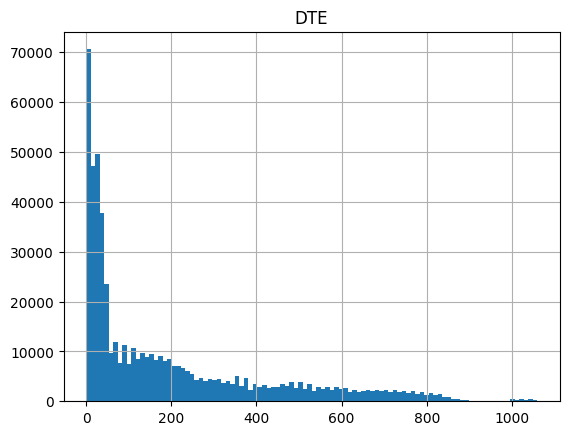

In [5]:
df_final.hist(column="DTE", bins=100)

### As we can see, there is a heavy skew towards shorter contracts in this dataset. 

In order to use this data for a viable trading strategy, we may want to consider truncating some longer duration contracts. The strategy proposed by https://tastytrade.com/, an options trading brokerage, recommends staying in the 45-60 day range when using the majority of trading strategies. We will explore the statistical backing behind this recommendation.

P.S. - I have no affiliation with TastyTrade, just a fan of their work and free learning materials!

In [111]:
# pd.DataFrame(df_final.DTE.value_counts()).head(20)
df_final

,QUOTE_UNIXTIME,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
0,1656705600,16.0,138.90,1656705600,0.00,1.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,0.00,68.80,68.95,70.0,0.00,0.01,0.02,-0.00093,0.00004,0.00011,-0.00547,0.0,4.88946,0.0,68.9,0.496
1,1656705600,16.0,138.90,1656705600,0.00,1.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,0.00,63.75,63.95,75.0,0.00,0.01,0.01,-0.00066,0.00001,0.00061,-0.00491,0.0,4.42208,0.0,63.9,0.460
2,1656705600,16.0,138.90,1656705600,0.00,1.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,0.00,58.75,58.95,80.0,0.00,0.01,0.01,-0.00108,0.00009,-0.00012,-0.00455,0.0,3.98422,0.0,58.9,0.424
3,1656705600,16.0,138.90,1656705600,0.00,1.00000,0.00000,0.00000,0.00000,0.00000,0.00001,6.0,53.16,52.10,55.70,85.0,0.00,0.01,0.01,-0.00100,0.00015,-0.00018,-0.00525,0.0,3.57179,0.0,53.9,0.388
4,1656705600,16.0,138.90,1656705600,0.00,0.99404,0.00067,0.00113,-0.05027,0.00173,3.96942,7.0,47.30,47.50,50.40,90.0,0.00,0.01,0.01,-0.00138,0.00014,0.00025,-0.00453,0.0,3.18082,0.0,48.9,0.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548158,1664568000,16.0,138.09,1737147600,840.04,0.14059,0.00348,0.46816,-0.00976,0.36018,0.30329,1.0,4.40,3.45,4.10,270.0,130.55,132.90,112.20,-1.00000,0.00000,0.00000,0.00000,0.0,NaN,0.0,131.9,0.955
548159,1664568000,16.0,138.09,1737147600,840.04,0.12515,0.00325,0.43074,-0.00904,0.32126,0.30406,0.0,4.31,2.91,3.65,280.0,140.50,142.90,122.00,-1.00000,0.00000,0.00000,0.00000,0.0,NaN,0.0,141.9,1.028
548160,1664568000,16.0,138.09,1737147600,840.04,0.10893,0.00298,0.39176,-0.00759,0.28245,0.30317,0.0,3.75,2.45,3.15,290.0,150.15,152.95,132.24,-1.00000,0.00000,0.00000,0.00000,0.0,NaN,0.0,151.9,1.100
548161,1664568000,16.0,138.09,1737147600,840.04,0.09147,0.00260,0.34565,-0.00654,0.24037,0.29926,33.0,2.30,2.06,2.45,300.0,160.00,162.95,149.28,-1.00000,0.00000,0.00000,0.00000,0.0,NaN,0.0,161.9,1.173


Text(0.5, 1.0, 'AAPL Stock Price - 2021 to 2023')

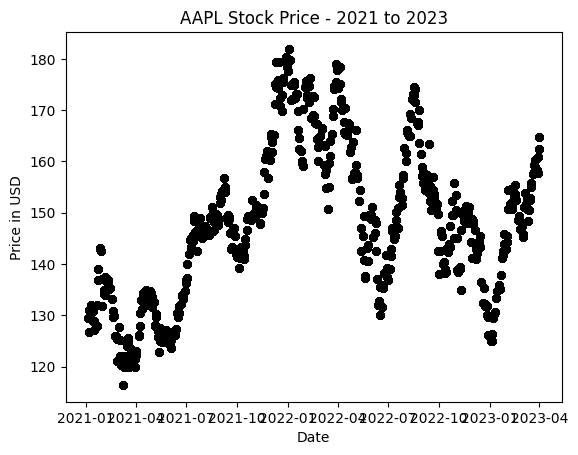

In [7]:
plt.scatter(
    pd.to_datetime(df_numeric["QUOTE_UNIXTIME"], unit="s"), df_numeric["UNDERLYING_LAST"], color="black", alpha=0.003
)
plt.ylabel("Price in USD")
plt.xlabel("Date")
plt.title("AAPL Stock Price - 2021 to 2023")

In [115]:
df_option_history = df_final.copy()

# df_option_history = df_option_history.loc[
#     (df_option_history.C_VOLUME.notna())
#     & (df_option_history.P_VOLUME.notna())
#     & (
#         (df_option_history.C_VOLUME > 50)
#         | (df_option_history.P_VOLUME > 50)
#     )
# ]

df_option_history["EXPIRE_UNIX"] = pd.to_datetime(df_option_history.EXPIRE_UNIX, unit="s", utc=True)
df_option_history["QUOTE_UNIXTIME"] = pd.to_datetime(df_option_history.QUOTE_UNIXTIME, unit="s", utc=True)
df_option_history.set_index(
    pd.DatetimeIndex([pd.Timestamp(x).round(freq="D") for x in df_option_history.QUOTE_UNIXTIME]), inplace=True
)
df_option_history.sort_values(by="QUOTE_UNIXTIME", inplace=True)
df_option_history.drop(columns=["QUOTE_UNIXTIME"], inplace=True)

timestamps = [pd.to_datetime(x, utc=True).round(freq="D") for x in df_option_history.index.values]
df_option_history.set_index(pd.DatetimeIndex(timestamps), inplace=True)

df_option_history["OPTION_ID"] = df_option_history["EXPIRE_UNIX"].astype(str) + df_option_history["STRIKE"].astype(str)
df_option_history["OPTION_ID"] = df_option_history["OPTION_ID"].apply(lambda x: hash(x))


def get_df_cnn_fear_greed_index():
    print("Retrieving historical ETF fear and greed index")
    import json

    with open("cnn_fear_greed_index_data.json") as f:
        cnn_fear_greed_index_data = json.load(f)

    df_fear_greed_index = pd.DataFrame(
        data=cnn_fear_greed_index_data["data"]["c:50108"]["series"][0], columns=["x", "y"]
    )
    df_fear_greed_index.set_index(
        pd.DatetimeIndex([pd.Timestamp(x, unit="s", tz="UTC") for x in df_fear_greed_index.x]),
        inplace=True,
    )
    df_fear_greed_index.rename(columns={"y": "fear_greed_index"}, inplace=True)
    return df_fear_greed_index


df_fear_greed_index = get_df_cnn_fear_greed_index()
df_option_history = df_option_history.join(df_fear_greed_index[["fear_greed_index"]], how="inner")
df_option_history["fear_greed_index"] = df_option_history.fear_greed_index.fillna(method="ffill").astype(float)

df_history = df_option_history.groupby(df_option_history.index).first()[["UNDERLYING_LAST", "fear_greed_index"]]
df_history.rename(columns={"UNDERLYING_LAST": "close"}, inplace=True)

for column in ["close", "fear_greed_index"]:
    for days in [14]:
        periods = days
        df_history[f"{column}_previous"] = df_history[column].shift(1)
        df_history[f"{column}_min_{days}"] = df_history[column].rolling(window=periods, min_periods=periods).min()
        df_history[f"{column}_max_{days}"] = df_history[column].rolling(window=periods, min_periods=periods).max()
        df_history[f"{column}_gradient_{days}"] = df_history[column].diff(periods=periods) / periods
        df_history[f"{column}_gradient_min_{days}"] = (
            df_history[f"{column}_gradient_{days}"].rolling(window=periods, min_periods=periods).min()
        )
        df_history[f"{column}_gradient_max_{days}"] = (
            df_history[f"{column}_gradient_{days}"].rolling(window=periods, min_periods=periods).max()
        )

CustomStrategy = ta.Strategy(
    name="RSI",
    ta=[
        {"kind": "rsi", "length": 14},
    ],
)

df_history.ta.strategy(CustomStrategy)
df_option_history = df_option_history.join(df_history.drop(columns=["fear_greed_index"]), how="inner")
# df_option_history.dropna(inplace=True)

df_option_history

Retrieving historical ETF fear and greed index


/var/folders/86/qt4jnsg167j7h7mqgbpp44kh0000gn/T/ipykernel_12003/2766092042.py:43: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_option_history["fear_greed_index"] = df_option_history.fear_greed_index.fillna(method="ffill").astype(float)


,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,OPTION_ID,fear_greed_index,close,close_previous,close_min_14,close_max_14,close_gradient_14,close_gradient_min_14,close_gradient_max_14,fear_greed_index_previous,fear_greed_index_min_14,fear_greed_index_max_14,fear_greed_index_gradient_14,fear_greed_index_gradient_min_14,fear_greed_index_gradient_max_14,RSI_14
2021-05-18 00:00:00+00:00,16.0,126.27,2021-11-19 21:00:00+00:00,186.04,0.06024,0.00413,0.10797,-0.00902,-16.85110,0.32023,101.0,0.66,0.66,0.71,185.0,59.29,59.45,0.00,-0.86364,0.00190,0.16925,-0.01694,-0.35916,0.36581,NaN,58.7,0.465,-2043049108413096139,34.8333,126.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,126.27,2021-11-19 21:00:00+00:00,186.04,0.07030,0.00473,0.12161,-0.01054,-18.05296,0.31256,1.0,0.79,0.79,0.83,180.0,54.41,54.55,0.00,-0.86561,0.00250,0.16970,-0.01591,-0.37174,0.34505,NaN,53.7,0.426,-1473416045466410597,34.8333,126.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,126.27,2021-11-19 21:00:00+00:00,186.04,0.08352,0.00556,0.13906,-0.01115,-19.70419,0.30577,6.0,0.94,0.94,1.00,175.0,49.55,49.75,0.00,-0.86513,0.00339,0.17529,-0.01589,-0.39277,0.32912,NaN,48.7,0.386,2298067436235895595,34.8333,126.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,126.27,2021-11-19 21:00:00+00:00,186.04,0.10055,0.00646,0.15956,-0.01324,0.05919,0.29969,52.0,1.14,1.16,1.22,170.0,44.80,44.94,0.00,-0.85979,0.00452,0.18473,-0.01575,-0.41828,0.31523,NaN,43.7,0.346,2051458371973418579,34.8333,126.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,126.27,2021-11-19 21:00:00+00:00,186.04,0.12280,0.00767,0.18371,-0.01455,0.07126,0.29455,1.0,1.46,1.45,1.49,165.0,40.10,40.24,0.00,-0.84860,0.00591,0.19940,-0.01592,-0.44444,0.30441,NaN,38.7,0.307,3609692898460904595,34.8333,126.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01 00:00:00+00:00,16.0,164.84,2023-05-19 20:00:00+00:00,49.00,0.94598,0.00303,0.06322,-0.03906,0.14964,0.56562,3.0,45.37,45.50,46.10,120.0,0.22,0.23,0.24,-0.02144,0.00183,0.03102,-0.01365,-0.00534,0.44552,9.0,44.8,0.272,-3757581433326981333,59.1714,164.84,162.37,152.49,164.84,1.027857,0.253571,1.027857,49.4857,22.6857,59.1714,2.434693,-2.8551,2.434693,69.674829
2023-04-01 00:00:00+00:00,16.0,164.84,2023-05-19 20:00:00+00:00,49.00,0.98649,0.00101,0.01623,-0.00984,0.15234,0.43903,1.0,50.43,49.10,51.05,115.0,0.15,0.17,0.17,-0.01521,0.00130,0.02329,-0.01052,-0.00343,0.47133,34.0,49.8,0.302,-3219488786252695011,59.1714,164.84,162.37,152.49,164.84,1.027857,0.253571,1.027857,49.4857,22.6857,59.1714,2.434693,-2.8551,2.434693,69.674829
2023-04-01 00:00:00+00:00,16.0,164.84,2023-05-19 20:00:00+00:00,49.00,0.95898,0.00201,0.05043,-0.03479,0.13584,0.66886,0.0,50.66,55.25,56.00,110.0,0.11,0.13,0.14,-0.01076,0.00096,0.01721,-0.00833,-0.00219,0.50149,250.0,54.8,0.333,-8984235828140040416,59.1714,164.84,162.37,152.49,164.84,1.027857,0.253571,1.027857,49.4857,22.6857,59.1714,2.434693,-2.8551,2.434693,69.674829
2023-04-01 00:00:00+00:00,16.0,164.84,2023-05-19 20:00:00+00:00,49.00,0.96511,0.00146,0.04284,-0.03521,0.11631,0.79587,0.0,60.40,65.25,65.85,100.0,0.06,0.07,0.07,-0.00521,0.00050,0.00959,-0.00564,-0.00152,0.56018,54.0,64.8,0.393,6215479560293436748,59.1714,164.84,162.37,152.49,164.84,1.027857,0.253571,1.027857,49.4857,22.6857,59.1714,2.434693,-2.8551,2.434693,69.674829


In [148]:
df_option_history.describe()

,QUOTE_TIME_HOURS,UNDERLYING_LAST,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,OPTION_ID,fear_greed_index,close,close_previous,close_min_14,close_max_14,close_gradient_14,close_gradient_min_14,close_gradient_max_14,fear_greed_index_previous,fear_greed_index_min_14,fear_greed_index_max_14,fear_greed_index_gradient_14,fear_greed_index_gradient_min_14,fear_greed_index_gradient_max_14,RSI_14
count,396011.0,396011.000000,396011.000000,396011.000000,396011.000000,396011.000000,396011.000000,396011.000000,376145.000000,358545.000000,395822.000000,395822.000000,395822.000000,396011.000000,395822.000000,395822.000000,395822.000000,396011.000000,396011.000000,396011.000000,396011.000000,396011.000000,358990.000000,337178.000000,396011.000000,396011.000000,3.960110e+05,396011.000000,396011.000000,394967.000000,383069.000000,383069.000000,382109.000000,370285.000000,370285.000000,394967.000000,383069.000000,383069.000000,382109.000000,370285.000000,370285.000000,382109.000000
mean,16.0,150.906325,199.591099,0.545574,0.006990,0.016688,-0.027801,0.441490,0.456310,236.225799,25.841064,28.320604,28.827553,151.560020,27.956077,28.502690,18.529701,-0.443856,0.007059,-0.209919,-0.028387,-0.257883,0.522519,221.226655,51.049172,0.339631,-3.342138e+16,42.510055,150.906325,150.854894,143.881235,158.032198,0.089942,-0.643825,0.769845,42.461856,29.395252,55.707319,0.014276,-1.488686,1.487786,53.591169
std,0.0,13.205212,228.257298,0.397669,0.015343,12.336362,0.042924,7.041576,0.541275,2024.558446,32.688680,33.267310,33.612575,62.900209,38.420130,38.910447,31.960633,0.390231,0.015060,14.262772,0.058969,0.590585,0.481401,1518.932550,37.607843,0.253068,5.376383e+18,17.545469,13.205212,13.200854,11.426140,12.762593,0.796473,0.737544,0.619870,17.548601,16.041122,15.065793,1.608063,1.315760,1.322278,12.349504
min,16.0,123.540000,0.000000,0.000120,-0.000130,-1430.999650,-2.500710,-858.745620,-0.000500,0.000000,0.000000,0.000000,0.000000,18.750000,0.000000,0.000000,0.000000,-1.000000,-0.000180,-1208.699930,-2.942630,-24.851360,-0.000500,0.000000,0.000000,0.000000,-9.222596e+18,4.028600,123.540000,123.540000,123.540000,127.220000,-1.608571,-1.608571,-0.635714,4.028600,4.028600,22.400000,-3.817350,-3.817350,-1.242857,29.214545
25%,16.0,142.800000,25.000000,0.084800,0.000620,0.013020,-0.032050,0.010280,0.293220,0.000000,0.340000,0.840000,0.980000,105.000000,0.540000,0.630000,0.080000,-0.862390,0.000490,0.014160,-0.031160,-0.274300,0.307740,0.000000,18.800000,0.125000,-4.622026e+18,28.016100,142.800000,142.800000,136.880000,149.560000,-0.502143,-1.391429,0.410714,27.885700,17.828600,43.800000,-1.204086,-2.492857,0.553064,43.194006
50%,16.0,149.570000,107.040000,0.648190,0.003210,0.089340,-0.016140,0.088320,0.344100,4.000000,10.100000,13.540000,14.000000,145.000000,7.300000,7.650000,2.410000,-0.355670,0.003060,0.094220,-0.014400,-0.045780,0.388140,3.000000,44.500000,0.294000,-6.996394e+16,40.628600,149.570000,149.560000,142.570000,155.350000,0.181429,-0.642857,0.770714,40.600000,22.700000,57.114300,-0.016671,-1.653064,1.428571,53.189723
75%,16.0,159.310000,304.000000,0.942850,0.007840,0.281885,-0.005680,0.425705,0.455090,48.000000,43.100000,48.550000,49.400000,195.000000,44.750000,45.700000,22.490000,-0.038480,0.008620,0.256420,-0.004950,-0.002160,0.553177,51.000000,77.500000,0.512000,4.642091e+18,58.257100,159.310000,159.290000,150.640000,167.460000,0.722857,-0.065000,1.265714,58.171400,39.542900,68.028600,1.308164,-0.610036,2.605707,62.707197
max,16.0,181.960000,1059.000000,1.000000,2.340810,30.280530,0.000000,136.300420,40.900770,183723.000000,155.400000,156.700000,157.100000,320.000000,193.000000,196.950000,193.100000,0.000000,2.823530,24.161080,0.000000,0.000000,13.287910,107605.000000,195.000000,1.560000,9.214985e+18,82.171400,181.960000,181.960000,172.000000,181.960000,1.942857,0.850000,1.942857,82.171400,69.485700,82.

In [164]:
money = 1000
start_money = money
owned_options = []
last_index = df_option_history.index.values[-1]

for index, row in df_option_history.iterrows():
    index_date = index.strftime(format="%Y-%m-%d")
    is_last_index = index.to_numpy() == last_index

    max_buy_price = money / 10
    call_ask_price = row.C_LAST * 100
    call_bid_price = row.C_LAST * 100
    put_ask_price = row.P_LAST * 100
    put_bid_price = row.P_LAST * 100

    owned_options_to_remove = []

    # good_call_buy = (row.RSI_14 >= row.fear_greed_index_max_14 or (row.RSI_14 >= 50 and row.fear_greed_index >= 50))
    good_call_buy = row.RSI_14 > 70
    good_put_buy = False

    for option_index, option in enumerate(owned_options):
        if option["OPTION_ID"] == row.OPTION_ID:
            if option["side"] == "call" and ((option["DTE"] - row.DTE) > 7 or not good_call_buy or is_last_index):
                money += call_bid_price
                owned_options_to_remove.append(option_index)
                print(f"{index_date} ${money:.2f} sell call {row.OPTION_ID} ${call_bid_price:.2f}")
            elif option["side"] == "put" and ((option["DTE"] - row.DTE) > 7 or not good_put_buy or is_last_index):
                money += put_bid_price
                owned_options_to_remove.append(option_index)
                print(f"{index_date} ${money:.2f} sell put {row.OPTION_ID} ${put_bid_price:.2f}")

    for option_index in owned_options_to_remove:
        del owned_options[option_index]

    if not is_last_index:
        if (
            good_call_buy
            and row.DTE > 14
            and row.DTE < 30
            and row.C_VOLUME > 100
            and call_ask_price > 10
            and call_ask_price <= max_buy_price
        ):
            money -= call_ask_price
            option_to_buy = row.to_dict()
            option_to_buy["side"] = "call"
            owned_options.append(option_to_buy)
            print(f"{index_date} ${money:.2f} buy call {row.OPTION_ID} ${call_ask_price:.2f}")
        elif (
            good_put_buy
            and row.DTE > 14
            and row.DTE < 30
            and row.P_VOLUME > 100
            and put_ask_price > 10
            and put_ask_price <= max_buy_price
        ):
            money -= put_ask_price
            option_to_buy = row.to_dict()
            option_to_buy["side"] = "put"
            owned_options.append(option_to_buy)
            print(f"{index_date} ${money:.2f} buy put {row.OPTION_ID} ${put_ask_price:.2f}")

print(f"Start money: ${start_money:.2f}")
print(f"End money: ${money:.2f} ({(money-start_money)/start_money*100:.2f}%)")

2021-06-22 $915.00 buy call 1367218793519951925 $85.00
2021-06-22 $850.00 buy call -5094558823084252730 $65.00
2021-06-22 $803.00 buy call 7604293696809185789 $47.00
2021-06-22 $769.00 buy call -5535393873758162284 $34.00
2021-06-22 $750.00 buy call -3965982323180082169 $19.00
2021-06-22 $720.00 buy call -5638668702616909444 $30.00
2021-06-22 $696.00 buy call -4215177160045318147 $24.00
2021-06-22 $675.00 buy call 6773821023684570394 $21.00
2021-06-23 $617.00 buy call -5535393873758162284 $58.00
2021-06-23 $585.00 buy call -3965982323180082169 $32.00
2021-06-23 $559.00 buy call -5369369988355591364 $26.00
2021-06-23 $542.00 buy call -7876941962316018953 $17.00
2021-06-23 $529.00 buy call 5886174226664632644 $13.00
2021-06-23 $491.00 buy call -4215177160045318147 $38.00
2021-06-24 $442.00 buy call -5535393873758162284 $49.00
2021-06-24 $416.00 buy call -3965982323180082169 $26.00
2021-06-24 $397.00 buy call -5369369988355591364 $19.00
2021-06-24 $384.00 buy call 5886174226664632644 $13.

IndexError: list assignment index out of range